# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm
from matplotlib.lines import Line2D

In [ ]:
import sys
print("Python:", sys.version)
print("numpy:", np.__version__)
print("Matplotlib:", matplotlib.__version__)
print("scipy:", scipy.__version__)

Python: 3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]
numpy: 1.26.4
Matplotlib: 3.10.1
scipy: 1.15.3


# Convergence of Rescaled Beta to Gaussian (note also the supports):

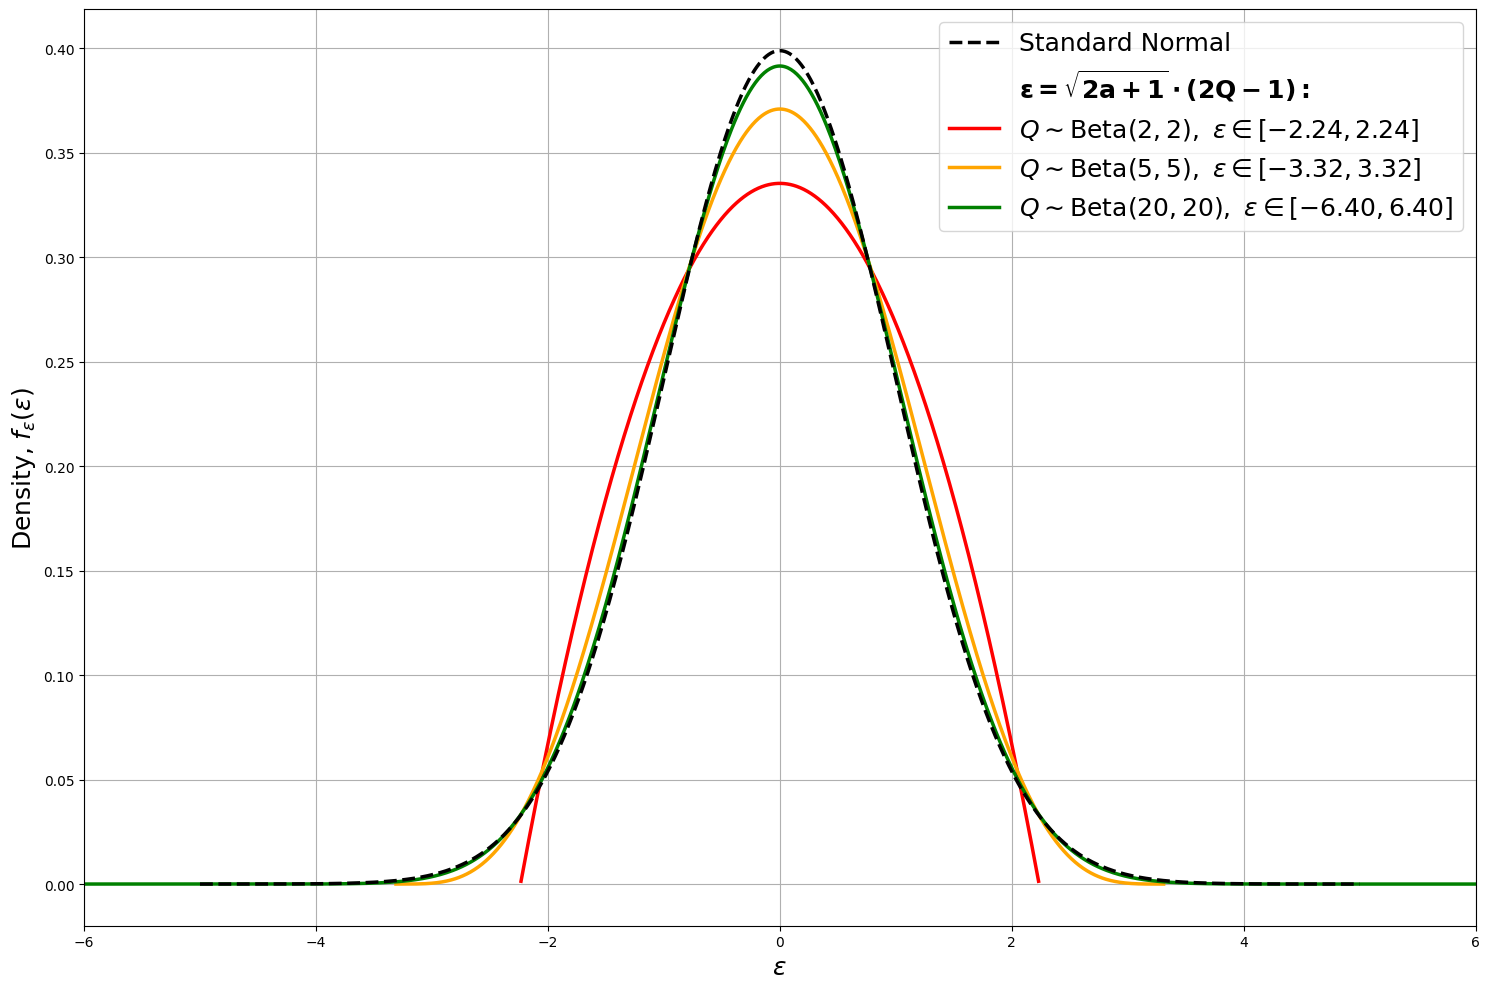

In [ ]:
# Define range for plotting
x = np.linspace(-5, 5, 1000)

# Different values of a to demonstrate convergence
a_values = [2, 5, 20]
colors = ['red', 'orange', 'green']

# Resizing
plt.figure(figsize=(15, 10))

# Prepare lists for beta lines and labels
beta_lines = []
beta_labels = []

for a, c in zip(a_values, colors):
    y = np.linspace(0.001, 0.999, 1000)
    eps = 2 * y - 1
    z = np.sqrt(2*a + 1) * eps
    dy_deps = 0.5
    pdf = beta.pdf((eps + 1)/2, a, a) * dy_deps
    pdf_rescaled = pdf / np.sqrt(2*a + 1)
    support_bound = np.sqrt(2*a + 1)
    line, = plt.plot(z, pdf_rescaled, color=c, linewidth=2.5)
    label = fr'$Q \sim \mathrm{{Beta}}({a}, {a}),\ \varepsilon \in [{-support_bound:.2f}, {support_bound:.2f}]$'
    beta_lines.append(line)
    beta_labels.append(label)

# Plot the standard normal distribution first (thicker line)
normal_line, = plt.plot(x, norm.pdf(x), 'k--', linewidth=2.5, label='Standard Normal')

# Combine everything for a single stacked legend
all_handles = [normal_line]
all_labels = ['Standard Normal']
# Add a fake handle for legend title
title_handle = Line2D([], [], color='none')
all_handles += [title_handle] + beta_lines
all_labels += [r'$\mathbf{\varepsilon = \sqrt{2a + 1} \cdot (2Q - 1):}$'] + beta_labels

# Plot settings
plt.xlabel(r"$\varepsilon$")
plt.ylabel(r"Density, $f_\varepsilon(\varepsilon)$")
plt.grid(True)
plt.xlim(-6, 6)
plt.xlabel(r"$\varepsilon$", fontsize=18)
plt.ylabel(r"Density, $f_\varepsilon(\varepsilon)$", fontsize=18)


# Unified legend in top-right
plt.legend(
    handles=all_handles,
    labels=all_labels,
    loc='upper right',
    frameon=True,
    fontsize = 18
)

plt.tight_layout()
plt.show()
